In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorly as tl
from tensorly.decomposition import parafac

import CP_ALS3 as cp
from general_functions import sqrt_err_relative, check_coo_tensor, gen_coo_tensor

In [2]:
shape = (5, 7, 9)
rank = 3
ten = np.zeros(shape=shape)
p = np.zeros(shape=(shape[0], rank))
q = np.zeros(shape=(shape[1], rank))
r = np.zeros(shape=(shape[2], rank))
all_elem = np.prod(shape)
all_elem

315

In [3]:
p[0] = [1, 0, 0]
p[1] = [0, 1, 0]
p[2] = [0, 0, 1]

q[0] = [1, 0, 0]
q[1] = [0, 1, 0]
q[2] = [0, 0, 1]

r[0] = [1, 0, 0]
r[1] = [0, 1, 0]
r[2] = [0, 0, 1]

p[3] = [1, 1, 1]
q[3] = [1, 0, 1]
r[3] = [1, 0, 1]

p[4] = [1, 1, 1]
q[5] = [1, 0, 1]
r[6] = [1, 0, 1]

In [4]:
coo = list()
vals = list()
nnz = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        for k in range(shape[2]):
            temp = np.sum(p[i, :] * q[j, :] * r[k, :])
            ten[i, j, k] = temp
            if temp != 0:
                vals.append(temp)
                coo.append((i, j, k))
                nnz += 1
coo = np.array(coo)
vals = np.array(vals)
nnz

49

## TensorLy

In [7]:
%%time
rank = 3
iter_max = 10
(w, f), err = parafac(
    tensor=ten,
    rank=rank,
    n_iter_max=iter_max,
    init="random",
    random_state=1,
    return_errors=True,
)
rerror = sqrt_err_relative(coo, vals, shape, f[0], f[1], f[2])
print(f"Rel err = {rerror};")

Rel err = 0.35116670536779837;
CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 18.6 ms


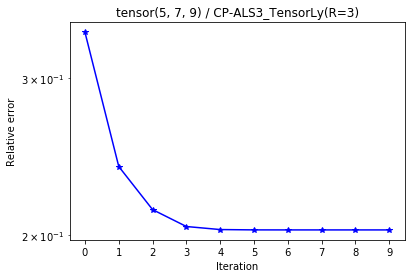

In [8]:
name = "CP-ALS3_TensorLy"
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"tensor{shape} / {name}(R={rank})")
plt.xticks(np.arange(len(err)))
plt.yscale("log")
plt.plot(np.arange(len(err)), err, 'b-*')

Rel err = 1.1417486783225974e-07;
CPU times: user 182 ms, sys: 2.37 ms, total: 184 ms
Wall time: 184 ms


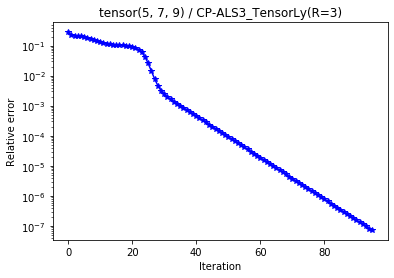

In [9]:
%%time
rank = 3
iter_max = 100
(w, f), err = parafac(
    tensor=ten,
    rank=rank,
    n_iter_max=iter_max,
    init="random",
    random_state=1,
    return_errors=True,
)

rerror = sqrt_err_relative(coo, vals, shape, f[0], f[1], f[2])
print(f"Rel err = {rerror};")

name = "CP-ALS3_TensorLy"
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"tensor{shape} / {name}(R={rank})")
#plt.xticks(np.arange(len(err)))
plt.yscale("log")
plt.plot(np.arange(len(err)), err, 'b-*')

## CP-ALS3

In [19]:
%%time
max_iter = 10
rank = 3
a, b, c, err, it = cp.cp_als3(coo, vals, shape, rank=rank, max_iter=max_iter, pr=False)
rerror = sqrt_err_relative(coo, vals, shape, a, b, c)
print(f"Rel err = {rerror};")

Rel err = 0.3511234557986135;
CPU times: user 2.79 ms, sys: 0 ns, total: 2.79 ms
Wall time: 7.63 ms


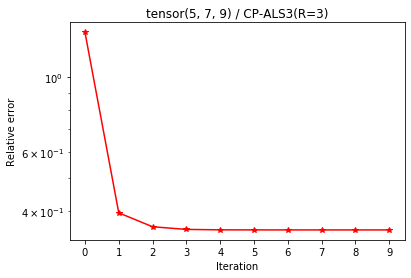

In [20]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"tensor{shape} / CP-ALS3(R={rank})")
plt.xticks(np.arange(it))
plt.yscale("log")
plt.plot(np.arange(it), err[:it], 'r-*')

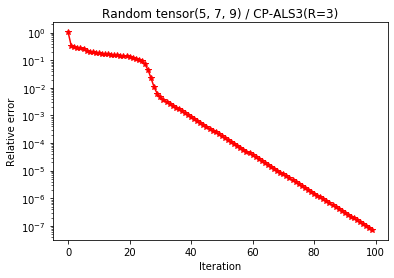

Rel err = 7.193148724917503e-08;
How many? 1


In [22]:
max_iter = 100
rank = 3
rerror = 5
hm = 0
name = "CP-ALS3"
while rerror > 1e-6:
    a, b, c, err, it = cp.cp_als3(coo, vals, shape, rank=rank, max_iter=max_iter, pr=False)
    rerror = sqrt_err_relative(coo, vals, shape, a, b, c)
    hm += 1

plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title(f"Random tensor{shape} / {name}(R={rank})")
#plt.xticks(np.arange(it))
plt.yscale("log")
plt.plot(np.arange(it), err[:it], 'r-*')
plt.show()
print(f"Rel err = {rerror};")
print(f"How many? {hm}")